Projet : Accident de la route
==============

Le projet qui vous a été attribué est le suivant : Accidents routiers en France

- Étape 1/ Exploration des données + DataViz’ : Deadline Vendredi 15 Mars
Votre première tâche consistera à définir le <span style="color: #26B260">**contexte**</span> et le <span style="color: #26B260">**périmètre du projet**</span> : j’attends que vous preniez vraiment le temps de bien comprendre le projet et de vous renseigner au mieux sur les notions que celui-ci va introduire.

Il faudra ensuite prendre en main et <span style="color: #26B260">**découvrir votre jeu de données**</span> et faire une <span style="color: #26B260">**analyse presque exhaustive**</span> de celui-ci afin de mettre en lumière la <span style="color: #26B260">**structure**</span>, les <span style="color: #26B260">**difficultés**</span> et <span style="color: #26B260">**eventuels</span> biais** du dataset.

Vous pourrez utiliser ce [**template : Template - Rapport exploration des données**](https://onedrive.live.com/edit?id=1DD0D0EFB906825!9189&resid=1DD0D0EFB906825!9189&ithint=file%2cxlsx&ct=1708768365134&wdOrigin=OFFICECOM-WEB.MAIN.UPLOAD&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=7b89bcec-2c24-4972-bd6b-334e7b3df731&wdo=2&cid=01dd0d0efb906825)
J’attendrai également au moins **5 représentations graphiques** construites à partir de votre jeu de données, visuelles et surtout pertinentes. Pour chacune d’elle j’attendrai :

Un <span style="color: #26B260">**commentaire**</span> précis, qui analyse la figure et apporte un avis “métier”.
Une <span style="color: #26B260">**validation du constat**</span> par des manipulations de données, ou un test statistique.


## Contexte

L’objectif de ce projet est d’essayer de prédire la gravité des accidents routiers en France. Les prédictions seront basées sur les données historiques.

La première étape est d’étudier et appliquer des méthodes pour nettoyer le jeu de données. 
La deuxième étape est d’extraire les caractéristiques qui semblent être pertinentes pour estimer la gravité d’accidents. 

On pourra créer un modèle prédictif, une fois l’entraînement du modèle effectué, nous allons comparer notre modèle avec les données historiques. 
Ensuite, à partir de ces résultats, on peut développer un scoring des zones à risque en fonction des informations météorologiques, l’emplacement géographique (coordonnées GPS, images satellite, …)



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [13]:
# usagers impliqués
df_usa22 = pd.read_csv("dataset/usagers-2022.csv", sep=';')
df_usa21 = pd.read_csv("dataset/usagers-2021.csv", sep=';')
df_usa20 = pd.read_csv("dataset/usagers-2020.csv", sep=';')
df_usa19 = pd.read_csv("dataset/usagers-2019.csv", sep=';')

df_usa = pd.concat([df_usa22, df_usa21, df_usa20, df_usa19], join='inner')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494182 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      494182 non-null  int64  
 1   id_vehicule  494182 non-null  object 
 2   num_veh      494182 non-null  object 
 3   place        494182 non-null  int64  
 4   catu         494182 non-null  int64  
 5   grav         494182 non-null  int64  
 6   sexe         494182 non-null  int64  
 7   an_nais      488241 non-null  float64
 8   trajet       494182 non-null  int64  
 9   secu1        494182 non-null  int64  
 10  secu2        494182 non-null  int64  
 11  secu3        494182 non-null  int64  
 12  locp         494182 non-null  int64  
 13  actp         494182 non-null  object 
 14  etatp        494182 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 60.3+ MB


In [46]:
# décrit le lieu principal de l’accident même si celui-ci s’est déroulé à une intersection
df_lieux22 = pd.read_csv("dataset/lieux-2022.csv", sep=';')
df_lieux21 = pd.read_csv("dataset/lieux-2021.csv", sep=';')
df_lieux20 = pd.read_csv("dataset/lieux-2020.csv", sep=';')
df_lieux19 = pd.read_csv("dataset/lieux-2019.csv", sep=';')

df_lieux = pd.concat([df_lieux22, df_lieux21, df_lieux20, df_lieux19], join='inner')
df_lieux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218404 entries, 0 to 58839
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  218404 non-null  int64  
 1   catr     218404 non-null  int64  
 2   voie     195330 non-null  object 
 3   v1       207658 non-null  float64
 4   v2       17276 non-null   object 
 5   circ     218404 non-null  int64  
 6   nbv      218404 non-null  object 
 7   vosp     218404 non-null  int64  
 8   prof     218404 non-null  int64  
 9   pr       218404 non-null  object 
 10  pr1      218404 non-null  object 
 11  plan     218404 non-null  int64  
 12  lartpc   496 non-null     object 
 13  larrout  159936 non-null  object 
 14  surf     218404 non-null  int64  
 15  infra    218404 non-null  int64  
 16  situ     218404 non-null  int64  
 17  vma      218404 non-null  int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 31.7+ MB


/tmp/ipykernel_16910/940459027.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux22 = pd.read_csv("dataset/lieux-2022.csv", sep=';')


In [36]:
# décrit les circonstances générales de l’accident
df_carac22 = pd.read_csv("dataset/caracteristiques-2022.csv", sep=';') 
df_carac21 = pd.read_csv("dataset/caracteristiques-2021.csv", sep=';') 
df_carac20 = pd.read_csv("dataset/caracteristiques-2020.csv", sep=';')
df_carac19 = pd.read_csv("dataset/caracteristiques-2019.csv", sep=';')

# remplacer la colonne Accident_Id en Num_Acc pour que tous les datasets aient le même nom de colonne
df_carac22.columns = df_carac22.columns.str.replace('Accident_Id', 'Num_Acc')

df_car = pd.concat([df_carac22, df_carac21, df_carac20, df_carac19], join='inner')
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218404 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  218404 non-null  int64 
 1   jour     218404 non-null  int64 
 2   mois     218404 non-null  int64 
 3   an       218404 non-null  int64 
 4   hrmn     218404 non-null  object
 5   lum      218404 non-null  int64 
 6   dep      218404 non-null  object
 7   com      218404 non-null  object
 8   agg      218404 non-null  int64 
 9   int      218404 non-null  int64 
 10  atm      218404 non-null  int64 
 11  col      218404 non-null  int64 
 12  adr      215814 non-null  object
 13  lat      218404 non-null  object
 14  long     218404 non-null  object
dtypes: int64(9), object(6)
memory usage: 26.7+ MB


In [18]:
# véhicules impliqués
df_veh22 = pd.read_csv("dataset/vehicules-2022.csv", sep=';')
df_veh21 = pd.read_csv("dataset/vehicules-2021.csv", sep=';')
df_veh20 = pd.read_csv("dataset/vehicules-2020.csv", sep=';')
df_veh19 = pd.read_csv("dataset/vehicules-2019.csv", sep=';')

df_veh = pd.concat([df_veh22, df_veh21, df_veh20, df_veh19], join='inner')
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373584 entries, 0 to 100709
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      373584 non-null  int64  
 1   id_vehicule  373584 non-null  object 
 2   num_veh      373584 non-null  object 
 3   senc         373584 non-null  int64  
 4   catv         373584 non-null  int64  
 5   obs          373584 non-null  int64  
 6   obsm         373584 non-null  int64  
 7   choc         373584 non-null  int64  
 8   manv         373584 non-null  int64  
 9   motor        373584 non-null  int64  
 10  occutc       3074 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 34.2+ MB


In [54]:
#df_temp = pd.concat([df_veh, df_usa, df_car, df_lieux], join='outer', keys='Num_Acc')
df_temp = pd.merge(df_car, df_veh, on = 'Num_Acc')
df_temp2 = pd.merge(df_temp, df_usa, on = ['Num_Acc', 'id_vehicule', 'num_veh'])
df = pd.merge(df_temp2, df_lieux, on = 'Num_Acc')
df

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",813 952,A01,1,2,0,2,1,9,1,NaN,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1,4,TEIL(vieille route du),0.0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",813 953,B01,1,7,0,2,2,1,1,NaN,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1,4,TEIL(vieille route du),0.0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",813 950,B01,2,7,0,2,8,15,1,NaN,1,1,4,1,1988.0,9,1,0,-1,0,0,-1,4,NaN,0.0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
3,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",813 951,A01,2,10,0,2,1,1,1,NaN,1,1,1,1,1970.0,4,1,0,-1,0,0,-1,4,NaN,0.0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
4,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000",813 948,A01,2,7,0,2,1,2,1,NaN,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1,3,ROND POINT DE BREZILLET,0.0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494177,201900058837,27,11,2019,07:50,1,67,67482,1,1,8,4,Autoroute A.35,"48,5769000","7,7269000",137 982 135,C01,1,7,0,2,1,2,1,NaN,1,1,4,2,1988.0,1,1,0,-1,-1,-1,-1,1,35,0.0,NaN,1,2,0,1,303,282,1,NaN,NaN,2,0,1,90
494178,201900058838,30,11,2019,02:41,4,94,94021,1,1,1,6,AUTOROUTE A6A,"48,7717000","2,3457600",137 982 132,A01,2,7,3,0,1,21,0,NaN,1,1,4,1,1998.0,9,1,0,-1,-1,-1,-1,1,6,0.0,A,3,3,0,1,5,199,1,NaN,NaN,1,0,1,90
494179,201900058839,30,11,2019,15:20,1,78,78640,1,1,1,7,A86 EXT,"48,7772890","2,2237590",137 982 131,A01,2,33,0,0,7,1,1,NaN,1,1,3,1,1979.0,0,2,0,-1,-1,-1,-1,1,86,0.0,NaN,1,1,0,1,59,99,3,NaN,NaN,1,0,1,50
494180,201900058840,29,11,2019,20:50,3,92,92047,1,1,1,2,A13,"48,8351236","2,1751101",137 982 129,B01,1,10,0,2,4,0,2,NaN,1,1,4,1,1974.0,0,1,0,-1,-1,0,-1,1,13,0.0,NaN,1,3,0,1,6,699,1,NaN,NaN,1,0,2,110


### Informations sur les données

Les données vont de 2005 à 2021, elles sont annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers) au format csv. Les données ont été anonymisées par le service de gouvernement. 
Les données répertories l'intégralité des accidents corporels de la circulation sur le territoire français (France métropolitaine et les DOM-TOM).
Le n° d'identifiant de l’accident (Cf. "Num_Acc") présent dans ces 4 rubriques permet d'établir un lien entre toutes les variables qui décrivent un accident.\
Quand un accident comporte plusieurs véhicules, il faut aussi pouvoir relier chaque véhicule à ses occupants. Ce lien est fait par la variable id_vehicule.


La variable cible est "grav" dans le dataset d'usagers.

### Notions introduites :

Qu'est-ce qui peut définir un accident comme grave ? 
Il y a : 
- le type d'accident, 
- la temporalité de l'accident (date et heure), 
- le lieu de l'accident, 
- les caractéristiques de l'accident, 
- les informations météorologiques de l'accident, 
- l'emplacement géographique de l'accident, 
- les circuits de l'accident,

Selon l'OMS, en 2023, 53% des décès dus aux accidents concernent des usagers de la route vulnérables, notamment : les piétons (23 %) ; les conducteurs de deux-roues et de trois-roues motorisés tels que les motocyclettes (21 %) ; les cyclistes (6 %) ; et les usagers d’engins de micro-mobilité comme les trottinettes électriques (3 %).

D'après les données disponibles pour 2021 de la commission européenne, 52 % des décès dus à des accidents de la route sont survenus en zone rurale, contre 39 % en zone urbaine et 9 % sur des autoroutes. Trois victimes sur quatre (78 %) sont des hommes.

En zone urbaine, les usagers vulnérables de la route (piétons, cyclistes et usagers de deux-roues motorisés) représentent près de 70 % du total des décès.

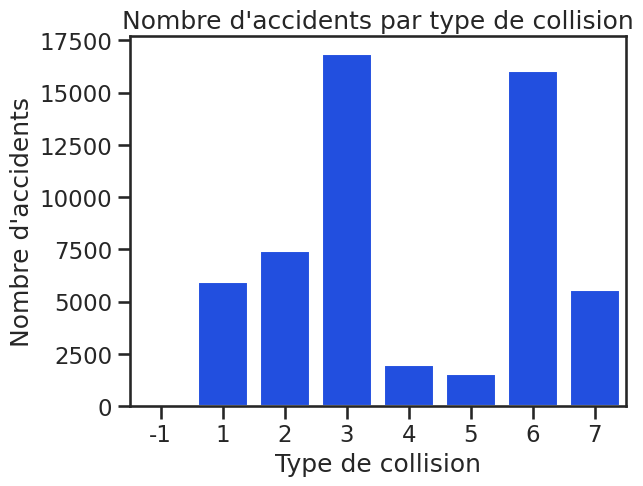

In [255]:
sns.countplot(x = df_carac22['col'])

plt.title("Nombre d'accidents par type de collision")
plt.xlabel("Type de collision")
plt.ylabel("Nombre d'accidents")
plt.show();

Le type de collision étant définit comme suivant : 
- -1 : Non renseigné
- 1 : Deux véhicules - frontale
- 2 : Deux véhicules – par l’arrière
- 3 : Deux véhicules – par le coté
- 4 : Trois véhicules et plus – en chaîne
- 5 : Trois véhicules et plus - collisions multiples
- 6 : Autre collision
- 7 : Sans collision

On observe que le type de collision le plus fréquent est un accident impliquant 2 véhicules ont une collision par le coté. La catégorie 'autre collision' étant trop vague, on ne pourra pas l'expliquer.

In [76]:
df_sexe_ano = df_usa22.loc[df_usa22['sexe'] == -1]
df_sexe_ano[df_sexe_ano['an_nais'].isna()]

df_usa22_ano_an_nais = df_usa22.loc[df_usa22['sexe'] == -1]
df_usa22_ano_an_nais[df_usa22_ano_an_nais['an_nais'].isna()]

df_sexe_filtered = df_usa22.loc[df_usa22['sexe'] != -1]

### EDA 1 : genre 

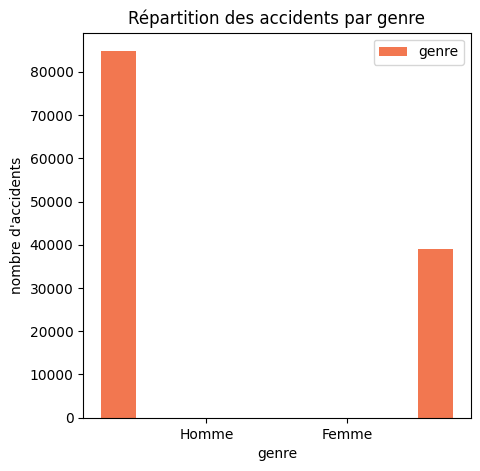

In [98]:
plt.figure(figsize= (5, 5))
plt.hist(df_sexe_filtered['sexe'],  color = ['#f27750'], label = ['genre'])

plt.xlabel("genre")
plt.ylabel("nombre d'accidents")
plt.xticks([1.3, 1.7], ['Homme', 'Femme'])
plt.title('Répartition des accidents par genre')
plt.legend();

Les hommes sont fortement représentés dans les accidents.

In [171]:
df_sexe_filtered.groupby(['grav']).count()#.plot(kind='bar')

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
grav,,,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,51126,51126,51126,51126,51126,51126,51126,50994,51126,51126,51126,51126,51126,51126,51126
2,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550
3,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260,19260
4,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981,49981


<Axes: xlabel='sexe'>

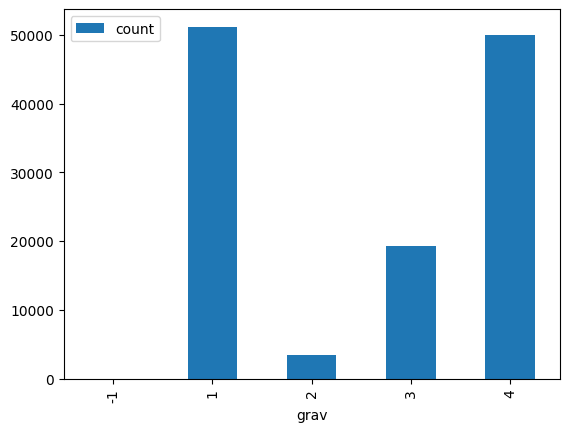

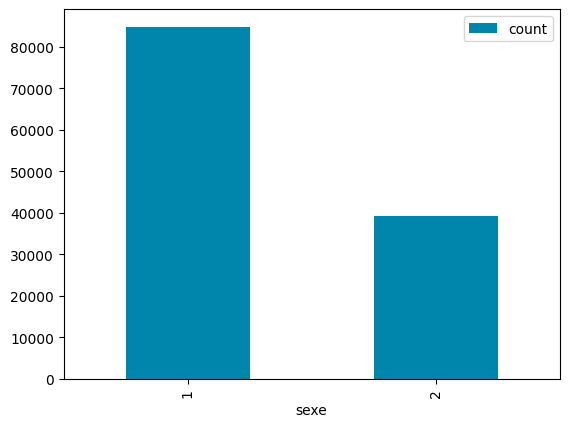

In [236]:
df_sexe_filtered.groupby(['grav'])['sexe'].agg(['count']).plot(kind='bar')
df_sexe_filtered.groupby(['sexe'])['grav'].agg(['count']).plot(kind='bar', 
                                                               color=['#0086ad', '#97ebdb'],
                                                               label=['sexe'])

In [204]:
df_sexe_filtered#.plot.bar(df_sexe_filtered['grav'])
#plt.xticks(range(6), ["Janvier","Février","Mars","Avril","Mai","Juin"])
#plt.legend();

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,968 230,715 631,A01,1,1,1,2,2002.0,5,1,-1,-1,0,0,-1
126658,202200055301,968 231,715 631,A01,8,2,3,2,2004.0,5,1,-1,-1,0,0,-1
126659,202200055301,968 232,715 632,B01,1,1,4,2,1953.0,5,1,-1,-1,0,0,-1
126660,202200055302,968 228,715 629,A01,1,1,3,1,1992.0,1,2,6,-1,-1,-1,-1


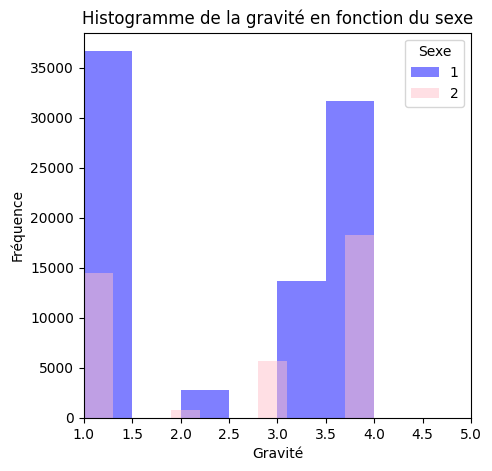

In [230]:
colors = {1: 'blue', 2: 'pink'}  

plt.figure(figsize=(5, 5))

for sexe, data in df_sexe_filtered.groupby('sexe'):
    plt.hist(data['grav'], color=colors[sexe], label=sexe, alpha=0.5) 

plt.legend(title='Sexe')
plt.xlabel('Gravité')
plt.xlim(1,5)
plt.ylabel('Fréquence')
plt.title('Histogramme de la gravité en fonction du sexe')
plt.show()

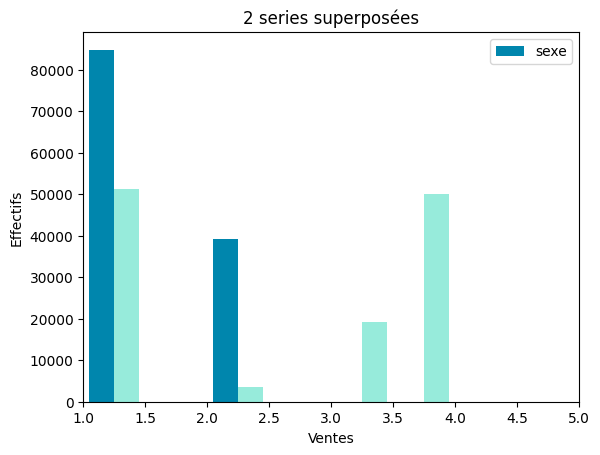

In [227]:
plt.hist([df_sexe_filtered.sexe, df_sexe_filtered.grav], 
         color = ['#0086ad', '#97ebdb'], rwidth = 0.8,
         label = ['sexe'])
plt.title('2 series superposées')
plt.xlabel("Ventes")
plt.xlim(1,5)
plt.ylabel('Effectifs')
plt.legend();

## Bibiographie :

- base de données : https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/#/resources

- documentation : https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/#/resources/8ef4c2a3-91a0-4d98-ae3a-989bde87b62a


